# Homework 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns

## 1. Multi-armed bandits 


In [92]:
q = np.random.normal(size = 10)

In [105]:
reward_dist = pd.DataFrame({i+1:np.random.normal(q[i],1,size = 1000) for i in range(len(q))})

In [106]:
reward_dist = reward_dist.melt().rename(columns = {'variable': 'Action','value': 'Reward'})

<Axes: xlabel='Action', ylabel='Reward'>

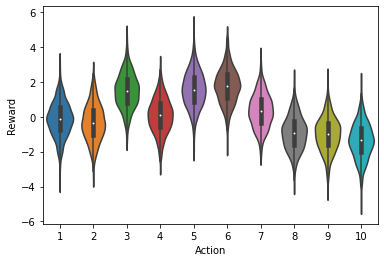

In [107]:
sns.violinplot(data = reward_dist, x = 'Action', y ='Reward')

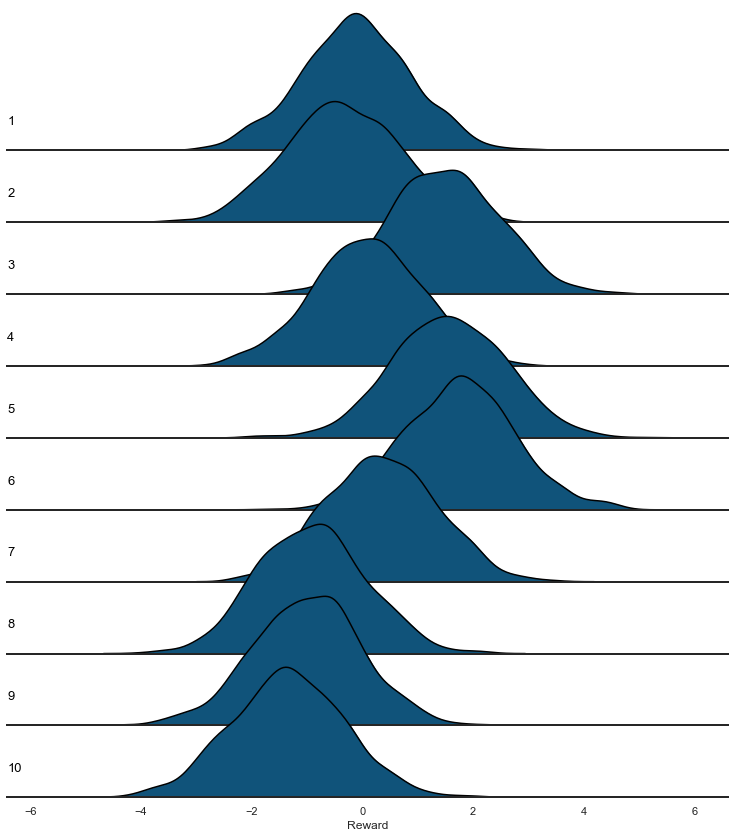

In [138]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = ['#10537a' for i in range(10)]

g = sns.FacetGrid(reward_dist, palette=palette, row="Action", hue ='Action',  aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="Reward", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="Reward", color='black')
def labeling(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)

g.map(labeling, "Action")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="Reward")
g.despine( left=True)

In [47]:
a = np.arange(1,11)

In [50]:
def greedy(q0, t_steps, n_trials, epsilon = 0, c = 0):
    
    action_list = np.zeros((n_trials,t_steps))
    reward_list = np.zeros((n_trials,t_steps))
    count_actions = np.zeros((n_trials,10))
    q_t = np.zeros((n_trials,10))
    true_qs = np.zeros((n_trials,10))
    for trial in range(n_trials):
        q_t[trial] = q0
        q = np.random.normal(size = 10)
        true_qs[trial] = q
        for step in range(t_steps):
            
            if np.random.uniform()< epsilon:
                action = np.random.choice(a)
            else:
                if c ==0:
                    ucb = 0
                else:
                    ucb = c * np.sqrt(np.log(step)/(count_actions[trial]))
                action = a[np.argmax(q_t[trial] + ucb)]
    
            action_list[trial,step] = action
            reward = np.random.normal(q[action-1],1)
            reward_list[trial,step] = reward
            count_actions[trial,action-1]+=1
            q_t[trial,action-1] = q_t[trial,action-1]+(1/count_actions[trial,action-1])*(reward-q_t[trial,action-1])
            
    return q_t, reward_list, action_list, count_actions, true_qs

In [51]:
q_gr, r_gr, a_gr,ca_gr, true_qs_gr = greedy(np.zeros(10), 1000, 2000)

In [52]:
q_gr_oiv, r_gr_oiv, a_gr_oiv,ca_gr_oiv, true_qs_oiv = greedy(5 * np.ones(10), 1000, 2000)

In [53]:
q_eps, r_eps, a_eps, ca_eps, true_qs_eps = greedy(np.zeros(10), 1000, 2000, 0.1)

In [54]:
q_eps_001, r_eps_001, a_eps_001, ca_eps_001, true_qs_eps_001 = greedy(np.zeros(10), 1000, 2000, 0.01)

In [55]:
q_ucb, r_ucb, a_ucb, ca_ucb, true_qs_ucb = greedy(np.zeros(10), 1000, 2000, 0, 2)

<ipython-input-50-6e59c7dc0a13>:20: RuntimeWarning:

divide by zero encountered in log

<ipython-input-50-6e59c7dc0a13>:20: RuntimeWarning:

invalid value encountered in sqrt

<ipython-input-50-6e59c7dc0a13>:20: RuntimeWarning:

invalid value encountered in true_divide

<ipython-input-50-6e59c7dc0a13>:20: RuntimeWarning:

divide by zero encountered in true_divide



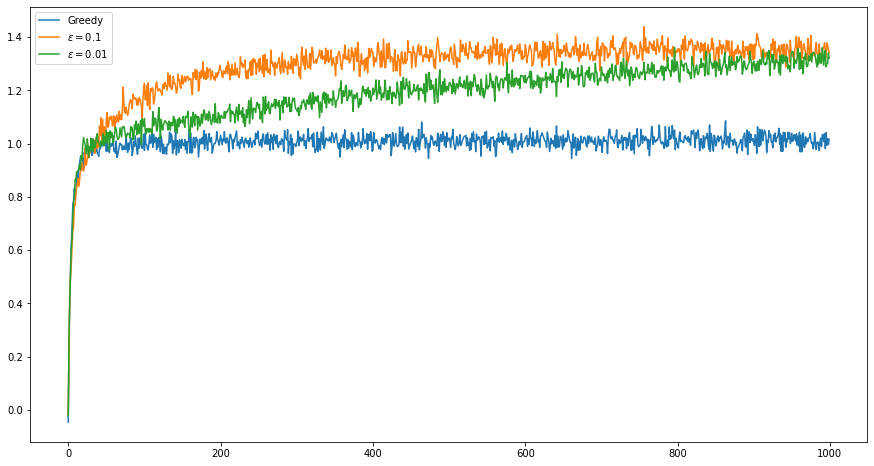

In [56]:
plt.figure(figsize=(15,8))

plt.plot(r_gr.mean(axis=0), label = 'Greedy')
#plt.plot(r_gr_oiv.mean(axis=0), label = 'Greedy OIV')
plt.plot(r_eps.mean(axis=0), label = r'$\epsilon = 0.1$')
plt.plot(r_eps_001.mean(axis=0), label = r'$\epsilon = 0.01$')
#plt.plot(r_ucb.mean(axis = 0), label= 'UCB')
plt.legend()
plt.show()

In [57]:
results_1 = pd.DataFrame({'Method' : ['Greedy', 'Greedy OIV', "Epsilon = 0.1",'Epsilon = 0.01', 'UCB' ],
                          'value': [r_gr.mean(axis=0),r_gr_oiv.mean(axis=0),
                                    r_eps.mean(axis=0),r_eps_001.mean(axis=0),
                                    r_ucb.mean(axis=0)]}).explode('value')
results_1['t'] = results_1.groupby('Method').cumcount()+1

In [88]:
q_ucb_1, r_ucb_1, a_ucb_1, ca_ucb_1, true_qs_ucb_1 = greedy(np.zeros(10), 1000, 2000, 0, 1)
q_ucb_3, r_ucb_3, a_ucb_3, ca_ucb_3, true_qs_ucb_3 = greedy(np.zeros(10), 1000, 2000, 0, 3)

<ipython-input-50-6e59c7dc0a13>:20: RuntimeWarning:

divide by zero encountered in log

<ipython-input-50-6e59c7dc0a13>:20: RuntimeWarning:

invalid value encountered in sqrt

<ipython-input-50-6e59c7dc0a13>:20: RuntimeWarning:

invalid value encountered in true_divide

<ipython-input-50-6e59c7dc0a13>:20: RuntimeWarning:

divide by zero encountered in true_divide



In [90]:
results_ucb = pd.DataFrame({'Method' : ['UCB c=1', 'UCB c=2', "UCB c=3"],
                          'value': [r_ucb_1.mean(axis=0),r_ucb.mean(axis=0),
                                    r_ucb_3.mean(axis=0)]}).explode('value')
results_ucb['t'] = results_ucb.groupby('Method').cumcount()+1

In [62]:
true_qs_ucb.max(axis = 1).mean()

1.5225684177615437

In [77]:
max_q_df = pd.melt(pd.DataFrame({'Greedy': true_qs_gr.max(axis = 1),
                         'Eps 0.1': true_qs_eps.max(axis = 1),
                         'Eps 0.01': true_qs_eps_001.max(axis = 1),
                         'Greedy OIV': true_qs_oiv.max(axis = 1),
                         'UCB': true_qs_ucb.max(axis = 1)})).rename(columns = {'variable':'method',
                                                                               'value':'max_q'})

Text(3.4, 1.65, 'Average Maximum q')

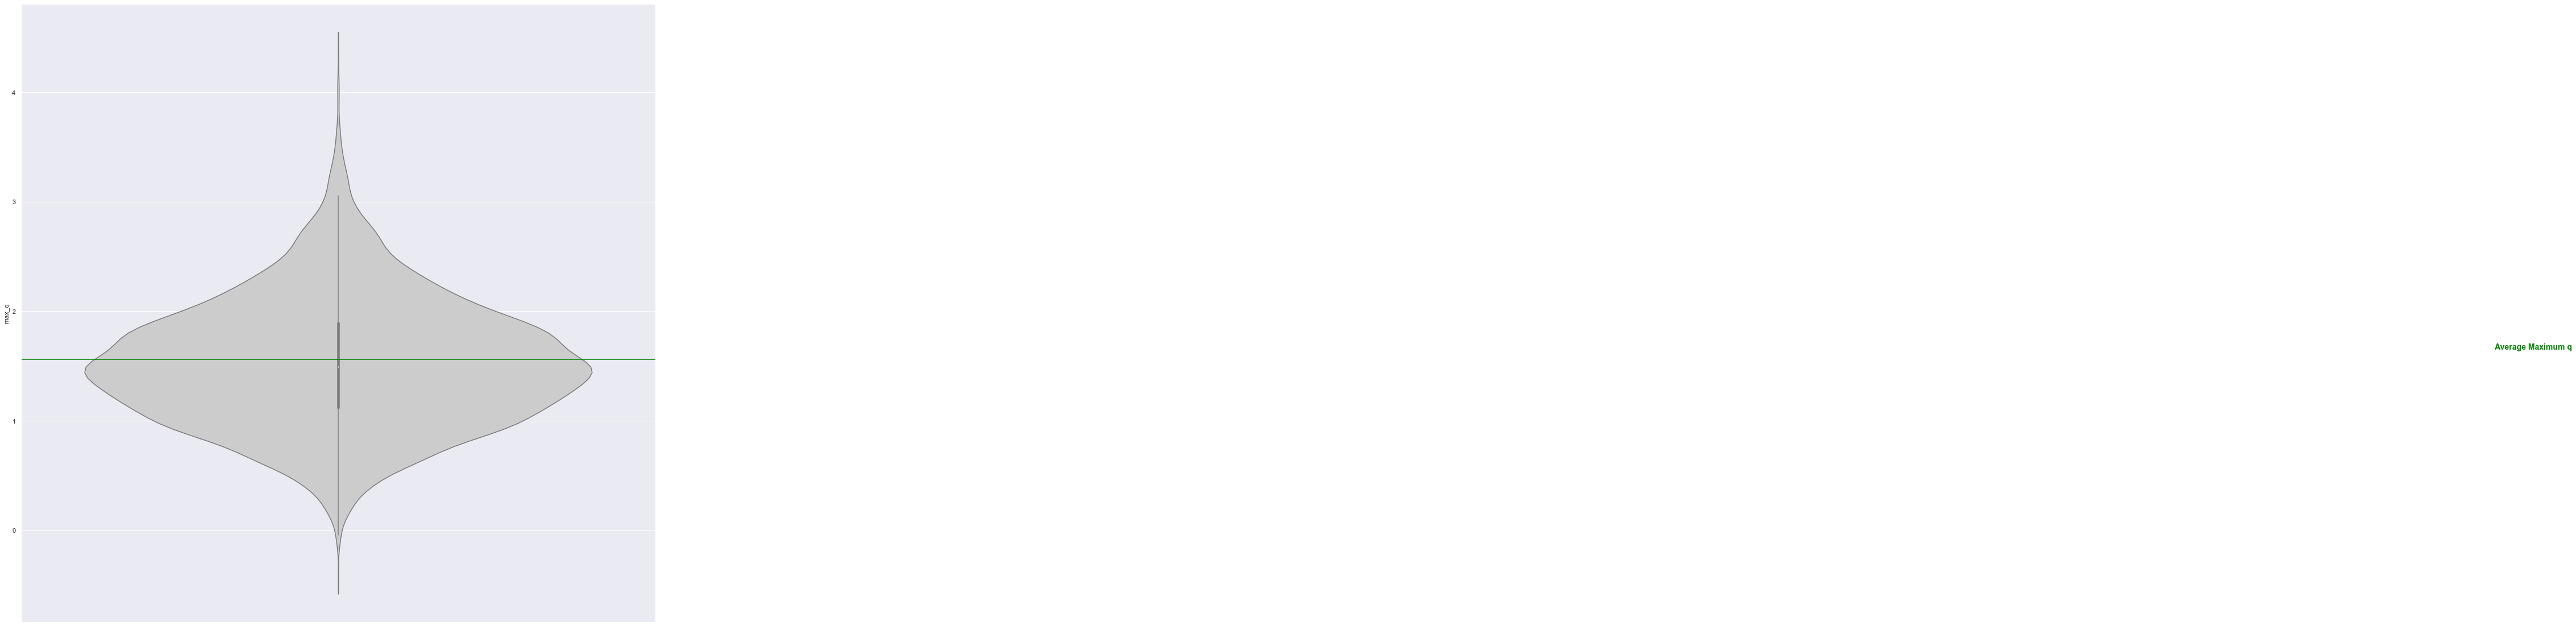

In [191]:
from scipy.stats import norm

expected_max_q = norm().ppf((10-np.pi/8)/(10-np.pi/4+1))
ax = sns.violinplot(data = max_q_df, y = 'max_q', color = '#cccccc')
ax.axhline(expected_max_q, color = 'green')
ax.text(3.4, 1.65, "Average Maximum q", 
       fontsize = 14,          # Size
       weight = "bold",  # Style
       color = "green")

In [192]:
expected_max_q

1.559371880117404

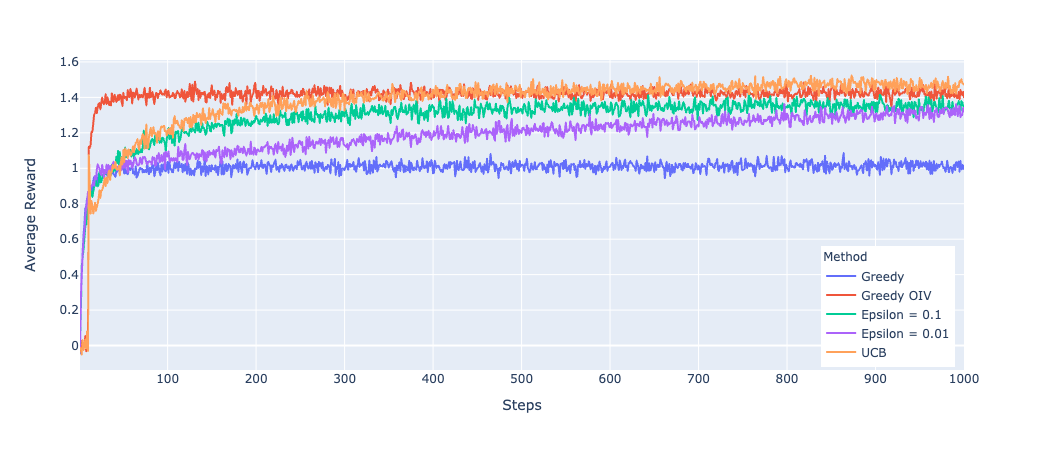

In [194]:
fig = px.line(results_1, x = 't', y = 'value', color = 'Method',labels={
                     "value": "Average Reward", 't':'Steps'
                 })
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=0.01,
    xanchor="right",
    x=0.99
))

fig.show()

# 2. The gambler problem

In [2]:
import math
def round_up(x, decimals):
    factor = 10 ** decimals
    return math.ceil(x * factor) / factor

In [99]:
gamma = 1
p_h = 0.4
theta = 10**-8
money = 100

S = np.arange(0,money+1)
n_s = len(S)
V = np.zeros(n_s)
first_Vs = np.zeros((3,n_s))


counter = 0
while counter <=10000:
    delta = 0
    for s in S[1:100]:
        old_v = V[s]
        a_states = [V[s]]
        for a in np.arange(1,min(s,100-s)+1):
            if s + a == 100:
                a_states.append(round_up(p_h + (1-p_h)*V[s-a],8))
            else:
                a_states.append(round_up(p_h*V[a+s] + (1-p_h)*V[s-a],8))
        V[s] = np.max(a_states)
        delta = max(delta, abs(V[s]-old_v))
        if counter <=2:
            first_Vs[counter] = V
    counter+=1
    if delta<theta:
        print('Delta small enough')
        break

Delta small enough


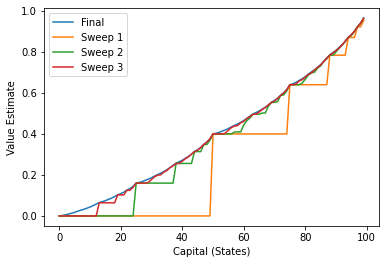

In [100]:
plt.plot(V[:-1], label = 'Final')
plt.plot(first_Vs[0][:-1], label = 'Sweep 1')
plt.plot(first_Vs[1][:-1], label = 'Sweep 2')
plt.plot(first_Vs[2][:-1], label = 'Sweep 3')
plt.xlabel('Capital (States)')
plt.ylabel('Value Estimate')
plt.legend()

In [101]:
import math
pi = np.zeros(99)

def round_up(x, decimals):
    return math.ceil(x * 10**decimals) / 10**decimals


for s in S[1:100]:
    a_states = []
    for a in np.arange(1,min(s,100-s)+1):
        if s + a == 100:
            a_states.append(round_up(p_h + (1-p_h)*V[s-a], 4))
        else:
            a_states.append(round_up(p_h*V[a+s] + (1-p_h)*V[s-a],4))
    
    pi[s-1] = np.argmax(a_states)+1

In [102]:
len(S[1:100])

99

Text(0.5, 0, 'Capital (States)')

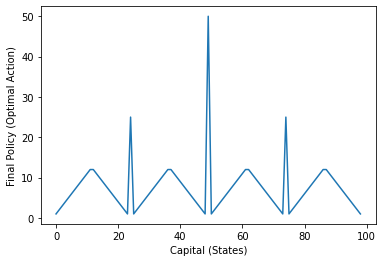

In [103]:
plt.plot(pi)
plt.ylabel('Final Policy (Optimal Action)')
plt.xlabel('Capital (States)')

In [114]:
[np.round(50*(1-1/2**n)) for n in range(25)]

[0.0,
 25.0,
 38.0,
 44.0,
 47.0,
 48.0,
 49.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0]

In [117]:
first_Vs[1][38]

0.25600001

In [110]:
first_Vs[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.16000001, 0.16000001, 0.16000001, 0.16000001, 0.16000001,
       0.16000001, 0.16000001, 0.16000001, 0.16000001, 0.16000001,
       0.16000001, 0.16000001, 0.16000001, 0.25600001, 0.25600001,
       0.25600001, 0.25600001, 0.25600001, 0.25600001, 0.31360001,
       0.31360001, 0.31360001, 0.34816001, 0.34816001, 0.36889601,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.40960001, 0.40960001, 0.40960001,
       0.44416001, 0.46489601, 0.47733761, 0.49600001, 0.49600001,
       0.49600001, 0.50176001, 0.50176001, 0.53493761, 0.55360001,
       0.55360001, 0.55705601, 0.58816001, 0.59023361, 0.61014